In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/raw/growmate_mock_data.csv")
df.head()


,plant_name,plant_type,pot_or_ground,soil_type,soil_ph,soil_nitrogen,soil_phosphorus,soil_potassium,plant_age_weeks,sunlight_exposure,last_watered_days,temperature,humidity,rainfall,season,watering_status
0,Cactus,Outdoor,Ground,Sandy,6.0,31,23,25,68,Full Sun,6,22.0,71,8.1,Autumn,0
1,Snake Plant,Indoor,Ground,Loamy,7.7,61,42,40,77,Low Light,3,26.3,73,1.4,Winter,0
2,Snake Plant,Indoor,Ground,Loamy,7.2,74,34,50,53,Low Light,1,29.1,56,13.9,Spring,0
3,Cactus,Outdoor,Ground,Sandy,5.7,21,12,18,13,Full Sun,5,25.9,64,13.9,Winter,0
4,Rose,Outdoor,Pot,Clayey,7.7,48,43,54,89,Full Sun,5,34.7,34,5.8,Monsoon,0


In [2]:
# Shape and types
print("Shape:", df.shape)
df.info()

# Summary statistics
df.describe()


Shape: (500, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plant_name         500 non-null    object 
 1   plant_type         500 non-null    object 
 2   pot_or_ground      500 non-null    object 
 3   soil_type          500 non-null    object 
 4   soil_ph            500 non-null    float64
 5   soil_nitrogen      500 non-null    int64  
 6   soil_phosphorus    500 non-null    int64  
 7   soil_potassium     500 non-null    int64  
 8   plant_age_weeks    500 non-null    int64  
 9   sunlight_exposure  500 non-null    object 
 10  last_watered_days  500 non-null    int64  
 11  temperature        500 non-null    float64
 12  humidity           500 non-null    int64  
 13  rainfall           500 non-null    float64
 14  season             500 non-null    object 
 15  watering_status    500 non-null    int64  
dtypes: float6

,soil_ph,soil_nitrogen,soil_phosphorus,soil_potassium,plant_age_weeks,last_watered_days,temperature,humidity,rainfall,watering_status
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,6.746200,51.788000,38.156000,40.382000,52.652000,3.432000,26.510600,60.562000,9.85420,0.154000
std,0.718358,16.813103,12.901184,13.714235,28.487365,2.325552,6.651571,17.846657,5.67765,0.467677
min,5.500000,20.000000,10.000000,15.000000,2.000000,0.000000,15.100000,30.000000,0.00000,0.000000
25%,6.100000,39.000000,30.000000,31.000000,29.000000,1.000000,20.475000,45.000000,5.07500,0.000000
50%,6.700000,50.000000,39.000000,42.000000,52.000000,3.000000,26.300000,60.000000,9.65000,0.000000
75%,7.400000,66.000000,48.000000,51.000000,76.000000,5.000000,32.125000,76.000000,14.50000,0.000000
max,8.000000,80.000000,60.000000,70.000000,104.000000,7.000000,38.000000,90.000000,20.00000,2.000000


In [3]:
# Missing values
df.isnull().sum()


plant_name           0
plant_type           0
pot_or_ground        0
soil_type            0
soil_ph              0
soil_nitrogen        0
soil_phosphorus      0
soil_potassium       0
plant_age_weeks      0
sunlight_exposure    0
last_watered_days    0
temperature          0
humidity             0
rainfall             0
season               0
watering_status      0
dtype: int64

## 🌱 Distribution of Plants

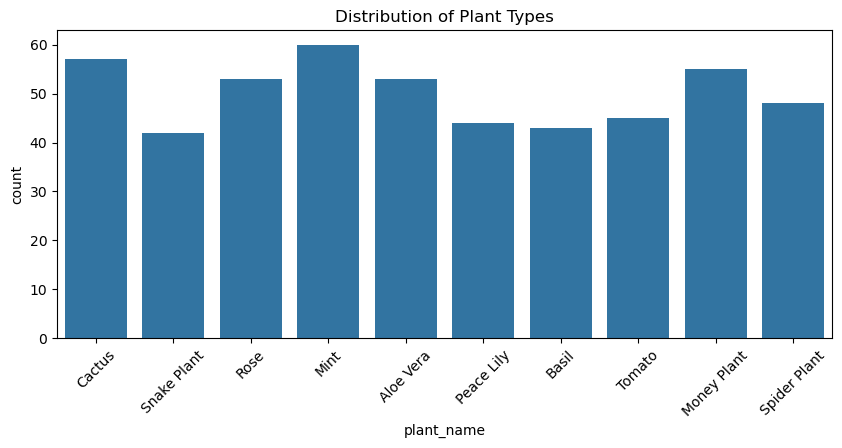

In [4]:
plt.figure(figsize=(10,4))
sns.countplot(x="plant_name", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Plant Types")
plt.show()


## ☀️ Sunlight Exposure

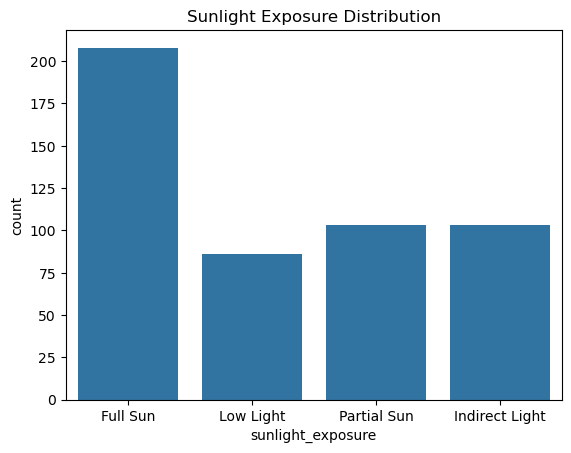

In [5]:
sns.countplot(x="sunlight_exposure", data=df)
plt.title("Sunlight Exposure Distribution")
plt.show()


## 📦 Pot vs Ground

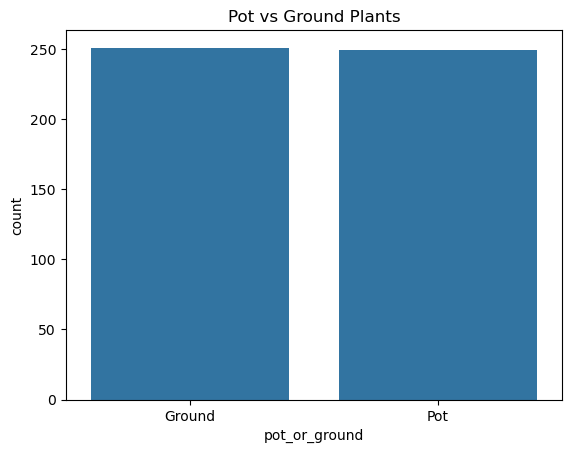

In [6]:
sns.countplot(x="pot_or_ground", data=df)
plt.title("Pot vs Ground Plants")
plt.show()


## 🧪 Soil Analysis (N, P, K, pH)

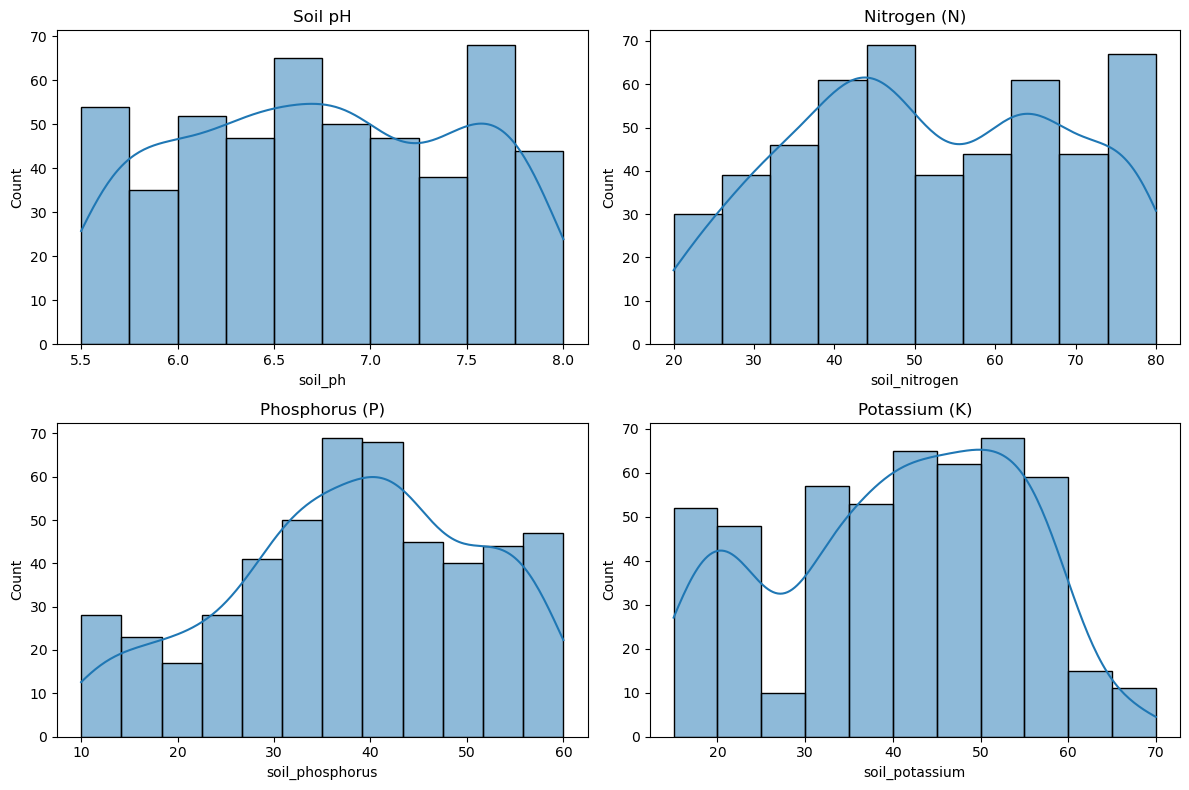

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.histplot(df["soil_ph"], ax=axes[0,0], kde=True).set_title("Soil pH")
sns.histplot(df["soil_nitrogen"], ax=axes[0,1], kde=True).set_title("Nitrogen (N)")
sns.histplot(df["soil_phosphorus"], ax=axes[1,0], kde=True).set_title("Phosphorus (P)")
sns.histplot(df["soil_potassium"], ax=axes[1,1], kde=True).set_title("Potassium (K)")
plt.tight_layout()
plt.show()


## 🌡 Weather Data

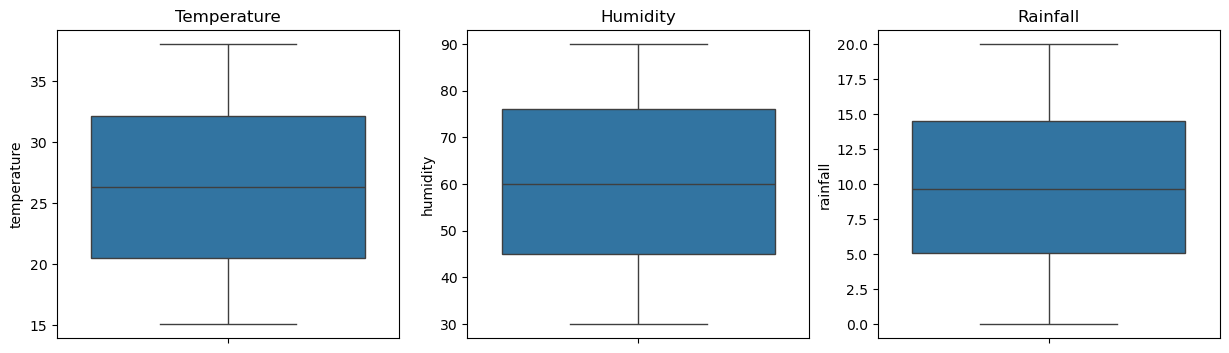

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(y="temperature", data=df, ax=axes[0])
sns.boxplot(y="humidity", data=df, ax=axes[1])
sns.boxplot(y="rainfall", data=df, ax=axes[2])
axes[0].set_title("Temperature")
axes[1].set_title("Humidity")
axes[2].set_title("Rainfall")
plt.show()


## watering_status

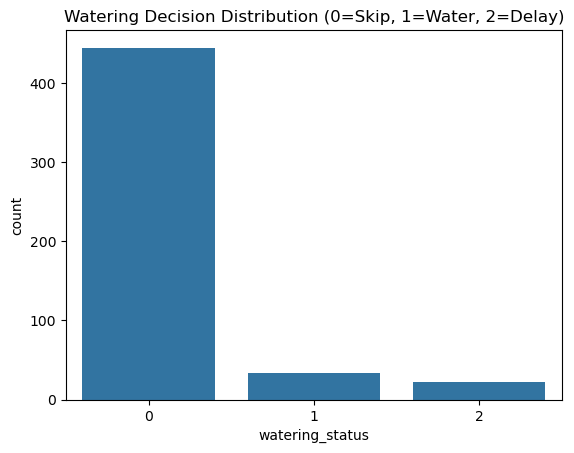

In [9]:
sns.countplot(x="watering_status", data=df)
plt.title("Watering Decision Distribution (0=Skip, 1=Water, 2=Delay)")
plt.show()


## Correlation Analysis

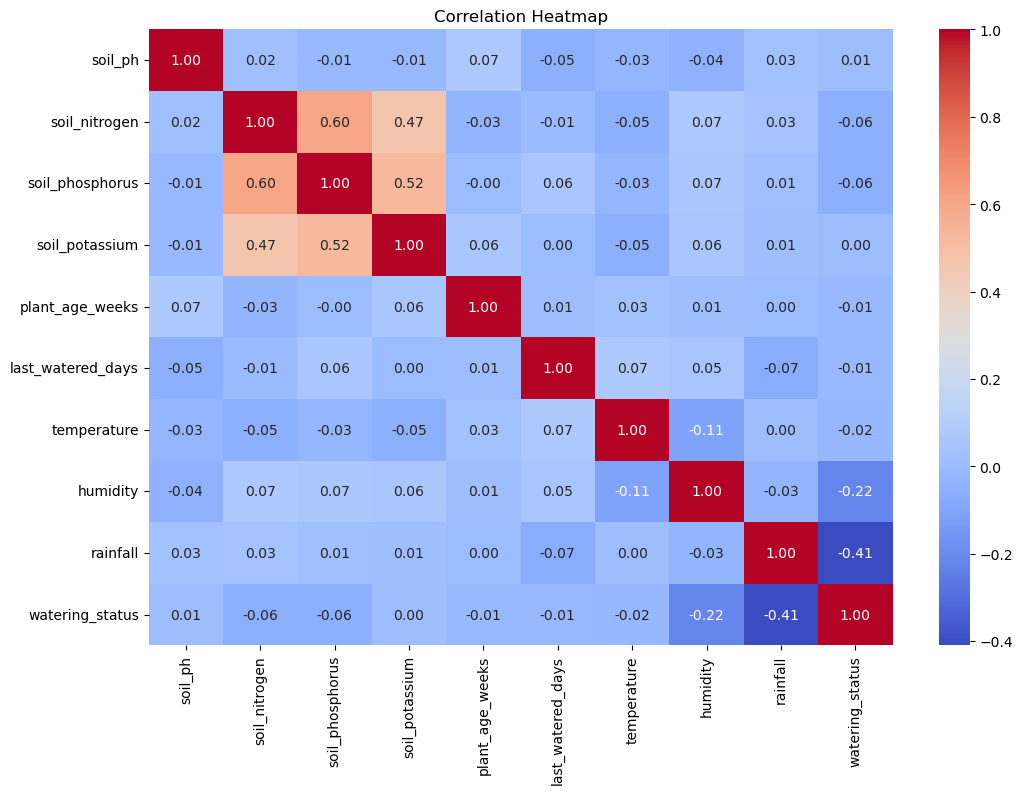

In [10]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
